In [1]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

### **Data Science Project: Planning Stage (Individual)**
##### Diego Arman Tabatabaei
##### Student ID: 56561418
##### DSCI 100
##### November 12, 2025
##### GitHub Link: https://github.com/YodawgYT/Project-Planning-Diego-Tabatabataei-Group-39-DSCI-100
### **INTRODUCTION**
We will be exploring two data sets related to a study conducted by a research group in Computer Science at UBC, led by Frank Wood, data can be found in https://plaicraft.ai. The data is part of a study conducted in Minecraft to help train an AI to identify different levels of skill in gameplay.

In [2]:
players_data <- read_csv("https://raw.githubusercontent.com/YodawgYT/Project-Planning-Diego-Tabatabataei-Group-39/refs/heads/main/players.csv")
sessions_data <- read_csv("https://raw.githubusercontent.com/YodawgYT/Project-Planning-Diego-Tabatabataei-Group-39/refs/heads/main/sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
summary(players_data)
head(players_data)

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [4]:
unique(select(players_data, gender))
unique(select(players_data, experience))

gender
<chr>
Male
Female
Non-binary
Prefer not to say
Agender
Two-Spirited
Other


experience
<chr>
Pro
Veteran
Amateur
Regular
Beginner


### **players.csv data:**
#### Columns:
- players.csv: Contains data of the participants
- experience: Player Skill
- subscribe: Logical value showing if the player is subscribed to the newsletter
- hashedEmail: Encryption of participant's email
- played_hours: Total gameplay hours
- name: Player name
- Age: Player age
#### Additional Information:
- There are 196 unique players.
- Two players did not disclose their age.
- 144 players are subscribed and 52 are not.
- 5 tiers of experience

In [5]:
summary(sessions_data)
head(sessions_data)

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


### **sessions.csv data:**
#### Columns:
- sessions.csv: The data of the gameplay sessions
- hashedEmail: Encryption of the email of the participant
- start_time: start time of the session
- end_time: end time of the session
- original_start_time: alternate measurement of start time 
- original_end_time: alternate measurement of end time
#### Additional Information:
- There is a total of, 1535 unique sessions across all 196 players.
- Two NA's appear in original_end_time
#### Issues
- Filtering sessions for a specific group of participants will be difficult as the sessions don't contain names, rather it has a unique 64 character identification.

### Question
I will be going with broad question 1 as there is sufficient data to create a good model to decently predict new data. My specific question, “Can age and play hours predict experience in the players' data set?”
I believe that a person's age and the amount of time they spent in the project can be good predictors, as a person's contribution and how it relates to their age, could narrow down an age range.

#### METHODS AND PLAN
The method I will be using is creating a K-NN model and using cross-validation to predict the class "True" and "False" for the newsletter factor. I will be using the subscription as the prediction, and the age of the participant as a predictor. 

- **Why is this method appropriate?**
Using a K nearest neighbors would be ideal for this specific question, as age and play hours are numeric values that can be plugged into the scatterplot, and can predict subscriptions.

- **Which assumptions are required, if any, to apply the method selected?**
Is there a relationship between game time, age, and subscription? 

- **What are the potential limitations or weaknesses of the method selected?**
There may not be enough players to be able to train the data enough with cross-validation to get an adequate prediction.

- **How are you going to compare and select the model?**
Since we are trying to predict a class using K nearest neighbors, as well, ill be evaluation the relationship between age and playtime, to see if there is a
  
- **How are you going to process the data to apply the model?**
I'm going to be splitting the training data into a 5-fold cross-validation to find the best K, for the K-NN model.

In [6]:
library(tidyverse)
players_numeric <- players_data |>
select(Age, played_hours, subscribe) |>
mutate(Age = as.numeric(Age), played_hours= as.numeric(played_hours), subscribe= as.factor(subscribe)) |>
filter(!is.na(Age), !is.na(played_hours))
head(players_numeric)

Age,played_hours,subscribe
<dbl>,<dbl>,<fct>
9,30.3,TRUE
17,3.8,TRUE
17,0.0,FALSE
21,0.7,TRUE
21,0.1,TRUE
17,0.0,TRUE


Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”


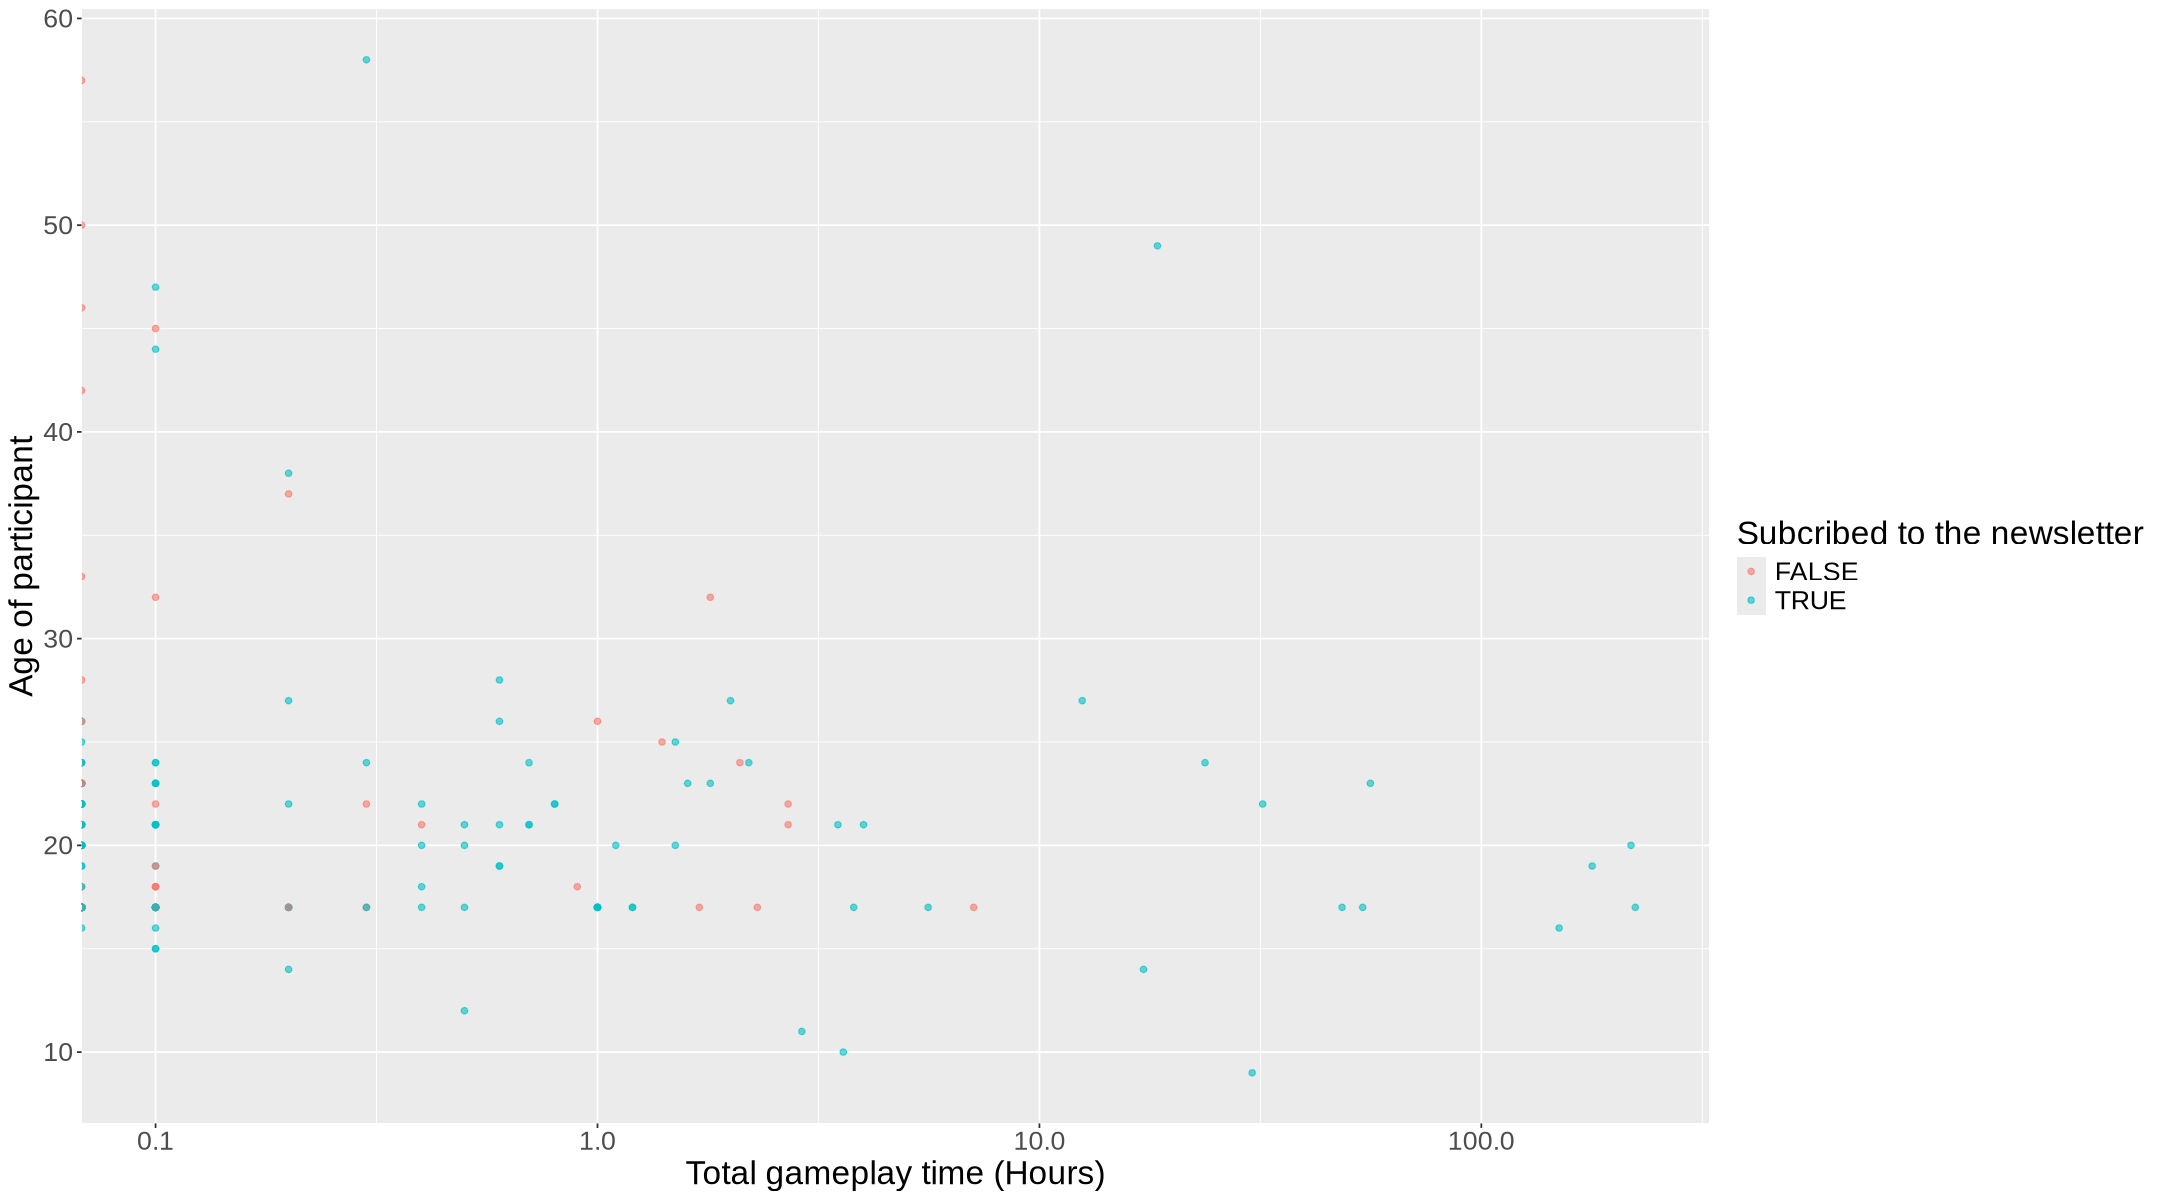

In [7]:
options(repr.plot.width= 18, repr.plot.height= 10)
players_scatter_plot <- players_numeric |>
ggplot(aes(x= played_hours, y= Age, color= subscribe)) +
geom_point(alpha = 0.6) +
scale_x_log10()+
labs(x= "Total gameplay time (Hours)", y= "Age of participant", color= "Subcribed to the newsletter", title= )+
theme(text= element_text(size=20))
players_scatter_plot

There is sufficient data to for a K-NN model. I had to use scale_x_log10, as some of the gameplay time in hours on the higher end prioritized the x value over the smaller amount. We see that every player past 10 hours is indeed subscribed, showing a level of commitment past a certain amount of game play. Overall, past the 0.1 mark, there is an abundance of TRUE subscribers, indicating a strong relationship to game time.

Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”


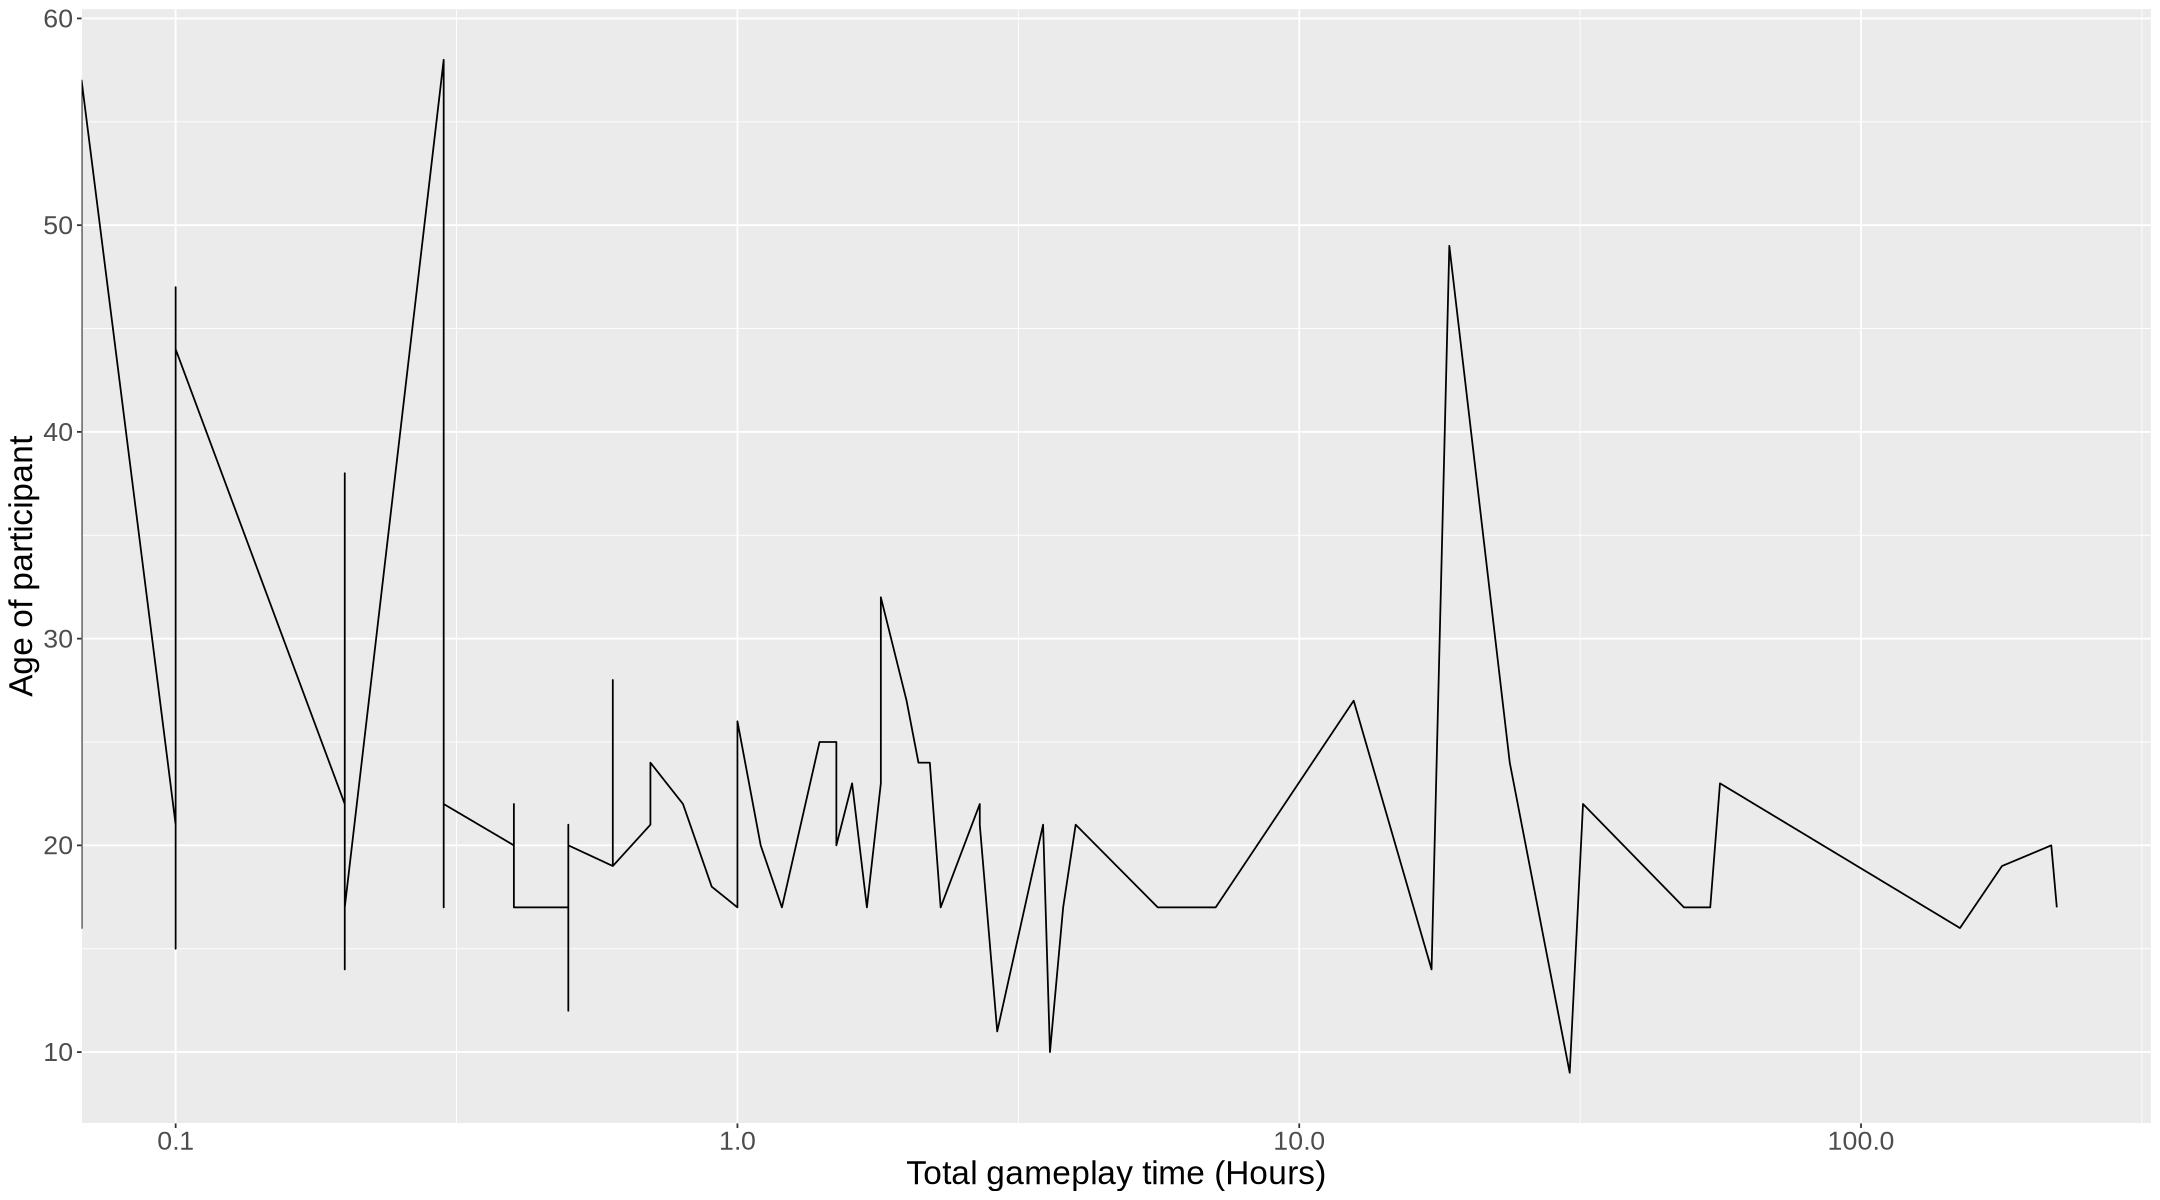

In [8]:
options(repr.plot.width= 18, repr.plot.height= 10)

players_line_plot <- players_numeric |>
ggplot(aes(x= played_hours, y= Age)) +
geom_line(stat= "identity") +
scale_x_log10()+
labs(x= "Total gameplay time (Hours)", y= "Age of participant", color= "Subcribed to the newsletter", title= )+
theme(text= element_text(size=20))
players_line_plot

Here we can visualize that past the 30-hour mark, the average age for the participants is around 20. This shows the average demographic of participants will to put in the most amount of time in the research, with a higher probable change of subscribing to the newsletter. This graph shows a strong relationship with time spent and the estimated age, further solidifying the case that age and play time have a relationship that can strongly predict new participants.